# Tarea 2

### Import Libraries and datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [3]:
# Connect with google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Import dataframe first part
part1=pd.read_excel('/content/drive/MyDrive/MAESTRIA CIENCIA DE DATO/fundamentos_DC/online_retail_II.xlsx','Year 2009-2010')

In [5]:
# Import dataframe second part
part2=pd.read_excel('/content/drive/MyDrive/MAESTRIA CIENCIA DE DATO/fundamentos_DC/online_retail_II.xlsx','Year 2010-2011')

In [6]:
# Union DataFrames
df = pd.concat([part1, part2], ignore_index=True)

In [7]:
# Inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Clean Data

### Clean spaces in description

In [9]:
def clean_spaces(df,column):
  df[column] = df[column].apply(lambda x: x.strip() if isinstance(x, str) else x)
  return df
df_cleaned_spaces = clean_spaces(df,'Description')

df_cleaned_spaces.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Create a new column named total_value

In [10]:
def calculate_total_value(df, quantity_column, price_column):
    df['total_value'] = df[quantity_column] * df[price_column]
    return df
df_new_column = calculate_total_value(df_cleaned_spaces, 'Quantity', 'Price')
df_new_column.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_value
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [11]:
def calculate_total_invoice(df):
  invoice_totals = df.groupby('Invoice')['total_value'].sum().reset_index()
  invoice_totals.rename(columns={'total_value': 'InvoiceTotal'}, inplace=True)
  df = df.merge(invoice_totals, on='Invoice', how='left')
  return df
df_total_invoice = calculate_total_invoice(df_new_column)
df_total_invoice.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_value,InvoiceTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,505.3
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,505.3
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,505.3
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,505.3
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,505.3


### Drop cancelled transactions

In [12]:
def clean_cancelled_transactions(df):
  df['Invoice'] = df['Invoice'].astype(str)
  # Identify canceled invoices
  canceled_df = df[df['Invoice'].str.startswith('C')].copy()
  # Compute original invoice numbers (Cxxxx - 1)
  originals_to_remove = canceled_df['Invoice'].str[1:].astype(int) - 1
  originals_to_remove = originals_to_remove.astype(str)
  # Combine both lists
  all_to_remove = pd.concat([canceled_df['Invoice'], originals_to_remove])
  # Drop both canceled and corresponding originals
  dfchanged = df[~df['Invoice'].isin(all_to_remove)]
  return dfchanged
df_no_cancelled = clean_cancelled_transactions(df_total_invoice)
df_no_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937399 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       937399 non-null  object        
 1   StockCode     937399 non-null  object        
 2   Description   933252 non-null  object        
 3   Quantity      937399 non-null  int64         
 4   InvoiceDate   937399 non-null  datetime64[ns]
 5   Price         937399 non-null  float64       
 6   Customer ID   720103 non-null  float64       
 7   Country       937399 non-null  object        
 8   total_value   937399 non-null  float64       
 9   InvoiceTotal  937399 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 78.7+ MB


In [13]:
#Visualize description from negative Quantitive values
# print(dfchanged[dfchanged['Quantity'] <= 0]['Description'].unique())

#print(dfchanged[dfchanged['Quantity'] <= 0]['Description'].unique())
# print(dfchanged[dfchanged['Quantity'] <=0])

### Drop rows that contains negative values in Quantity rows

In [14]:
def clean_negative_quantity(df):
  # Drop rows that have negative Quantity
  dfchanged = df[~df['Quantity']<0]
  return dfchanged
df_clean_negative = clean_negative_quantity(df_no_cancelled)
df_clean_negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934122 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       934122 non-null  object        
 1   StockCode     934122 non-null  object        
 2   Description   932535 non-null  object        
 3   Quantity      934122 non-null  int64         
 4   InvoiceDate   934122 non-null  datetime64[ns]
 5   Price         934122 non-null  float64       
 6   Customer ID   720103 non-null  float64       
 7   Country       934122 non-null  object        
 8   total_value   934122 non-null  float64       
 9   InvoiceTotal  934122 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 78.4+ MB


In [15]:
 df_clean_negative.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_value,InvoiceTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,505.3
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,505.3
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,505.3
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,505.3
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,505.3


In [16]:
df_clean_negative.describe()

,Quantity,InvoiceDate,Price,Customer ID,total_value,InvoiceTotal
count,934122.000000,934122,934122.000000,720103.000000,934122.000000,934122.000000
mean,11.173487,2011-01-05 07:47:57.472492800,3.831857,15326.457137,19.815899,1353.070861
min,1.000000,2009-12-01 07:45:00,-53594.360000,12346.000000,-53594.360000,-53594.360000
25%,1.000000,2010-07-13 11:57:00,1.250000,13975.000000,3.900000,299.280000
50%,3.000000,2010-12-07 15:31:00,2.100000,15260.000000,9.960000,525.350000
75%,11.000000,2011-07-27 10:40:00,4.130000,16798.000000,17.700000,1317.970000
max,74215.000000,2011-12-09 12:50:00,25111.090000,18287.000000,77183.600000,77183.600000
std,104.621385,NaN,97.074636,1696.003226,142.097012,2583.182547


In [17]:
df_clean_negative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934122 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       934122 non-null  object        
 1   StockCode     934122 non-null  object        
 2   Description   932535 non-null  object        
 3   Quantity      934122 non-null  int64         
 4   InvoiceDate   934122 non-null  datetime64[ns]
 5   Price         934122 non-null  float64       
 6   Customer ID   720103 non-null  float64       
 7   Country       934122 non-null  object        
 8   total_value   934122 non-null  float64       
 9   InvoiceTotal  934122 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 78.4+ MB


### Delete nulls

Invoice              0
StockCode            0
Description       1587
Quantity             0
InvoiceDate          0
Price                0
Customer ID     214019
Country              0
total_value          0
InvoiceTotal         0
dtype: int64


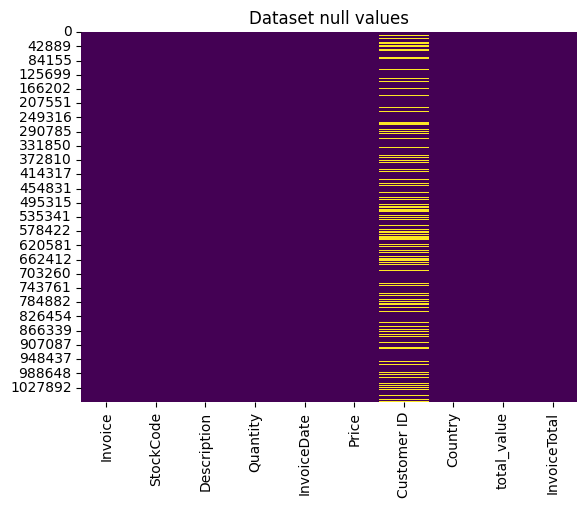

In [18]:
def visuallize_nulls(df):
  # Count null or nan per column
  print(df.isnull().sum())
  # print(df.isna().sum())
  # Null visualization
  sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
  plt.title("Dataset null values")
  plt.show()
visuallize_nulls(df_clean_negative)

### Fill null values
It is essential to analyze the importance of the different dataset columns. Accordingly, it is decided to fill in the empty fields in the CustomerID column with the integer -1 to map the invalid Customer ID numbers. In the Description field, it is decided to fill with 'unknown product'.

In [19]:
def fill_nulls(df):
  # Only fill NaN values with 'unknown product'
  df.loc[:, 'Description'] = df['Description'].fillna('unknown product')
  # Only fill NaN values with -1
  df.loc[:, 'Customer ID'] = df['Customer ID'].fillna(-1)
  return df
df_no_nulls = fill_nulls(df_clean_negative)
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934122 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       934122 non-null  object        
 1   StockCode     934122 non-null  object        
 2   Description   934122 non-null  object        
 3   Quantity      934122 non-null  int64         
 4   InvoiceDate   934122 non-null  datetime64[ns]
 5   Price         934122 non-null  float64       
 6   Customer ID   934122 non-null  float64       
 7   Country       934122 non-null  object        
 8   total_value   934122 non-null  float64       
 9   InvoiceTotal  934122 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 78.4+ MB


In [20]:
df_no_nulls.describe()

,Quantity,InvoiceDate,Price,Customer ID,total_value,InvoiceTotal
count,934122.000000,934122,934122.000000,934122.000000,934122.000000,934122.000000
mean,11.173487,2011-01-05 07:47:57.472492800,3.831857,11814.745553,19.815899,1353.070861
min,1.000000,2009-12-01 07:45:00,-53594.360000,-1.000000,-53594.360000,-53594.360000
25%,1.000000,2010-07-13 11:57:00,1.250000,12519.000000,3.900000,299.280000
50%,3.000000,2010-12-07 15:31:00,2.100000,14514.000000,9.960000,525.350000
75%,11.000000,2011-07-27 10:40:00,4.130000,16376.000000,17.700000,1317.970000
max,74215.000000,2011-12-09 12:50:00,25111.090000,18287.000000,77183.600000,77183.600000
std,104.621385,NaN,97.074636,6611.424651,142.097012,2583.182547


In [21]:
# Dimentions
print("Shape:", df_no_nulls.shape)

Shape: (934122, 10)


Invoice         0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
Price           0
Customer ID     0
Country         0
total_value     0
InvoiceTotal    0
dtype: int64


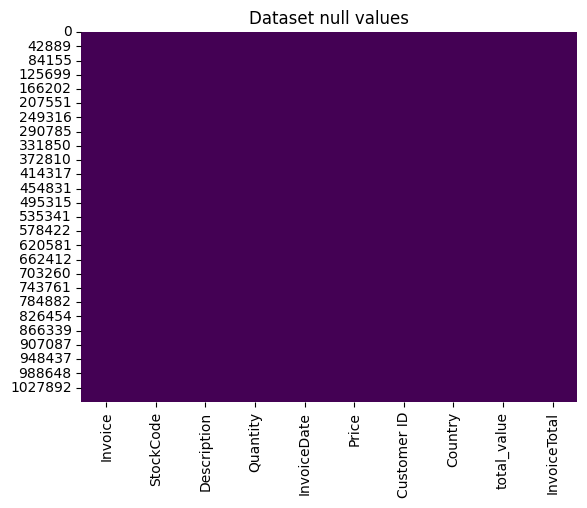

In [22]:
visuallize_nulls(df_no_nulls)

## EDA

In [22]:
df_no_nulls.columns.tolist()

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country',
 'total_value',
 'InvoiceTotal']

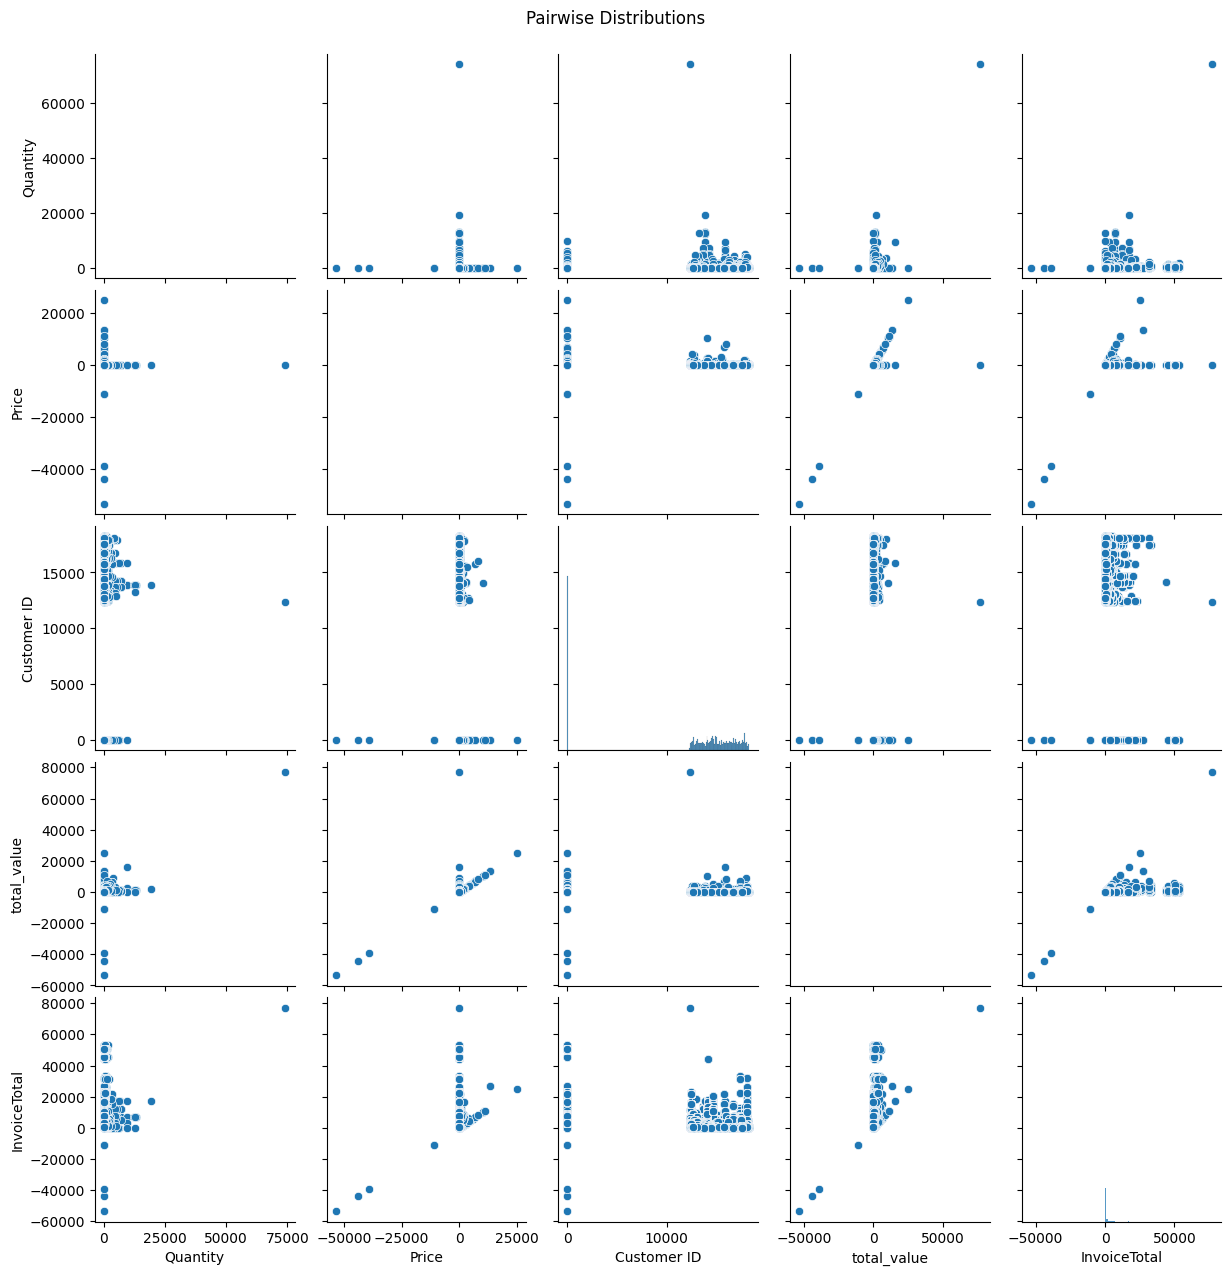

In [23]:
def pairplot(df):
  columns=df.columns.tolist()
  sns.pairplot(df[['Invoice','StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country',
 'total_value',
 'InvoiceTotal']])
  plt.suptitle("Pairwise Distributions", y=1.02)
  plt.show()
pairplot(df_no_nulls)

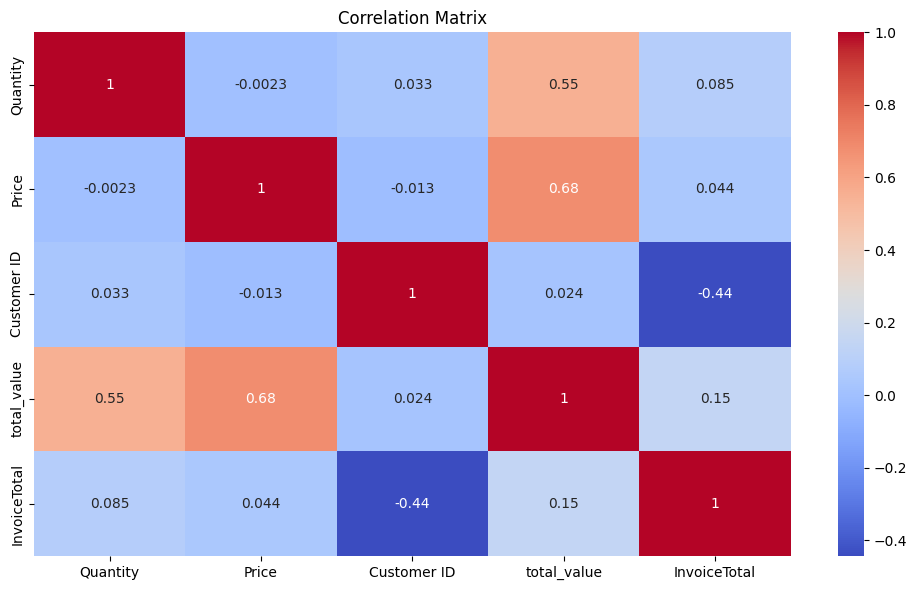

In [23]:
def correlation_matrix(df):
  # Calculate the correlation matrix
  plt.figure(figsize=(10, 6))

  # Select only numeric columns
  numeric_df = df.select_dtypes(include='number')

  sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
  plt.title('Correlation Matrix')
  plt.tight_layout()
  plt.show()

correlation_matrix(df_no_nulls)

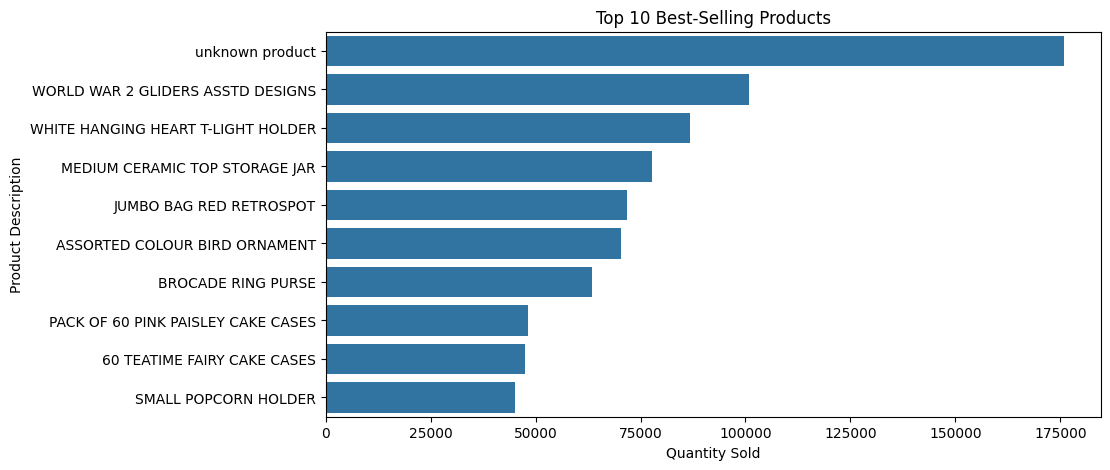

In [82]:
def plot_top_products(df):
  top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

  plt.figure(figsize=(10, 5))
  sns.barplot(x=top_products.values, y=top_products.index)
  plt.title('Top 10 Best-Selling Products')
  plt.xlabel('Quantity Sold')
  plt.ylabel('Product Description')
  plt.show()


plot_top_products(df_no_nulls)

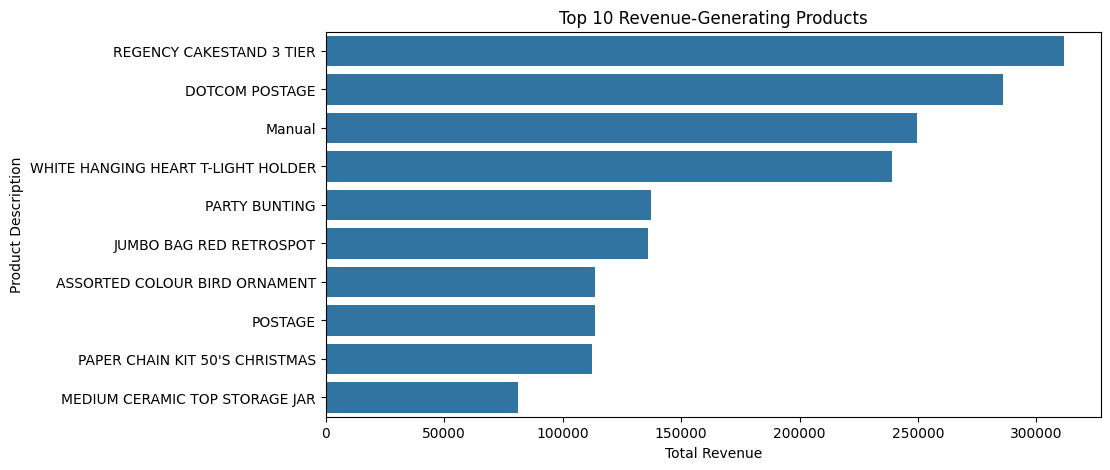

In [83]:
def plot_revenue_products(df):
  top_revenue_products = df.groupby('Description')['total_value'].sum().sort_values(ascending=False).head(10)

  plt.figure(figsize=(10, 5))
  sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index)
  plt.title('Top 10 Revenue-Generating Products')
  plt.xlabel('Total Revenue')
  plt.ylabel('Product Description')
  plt.show()

plot_revenue_products(df_no_nulls)


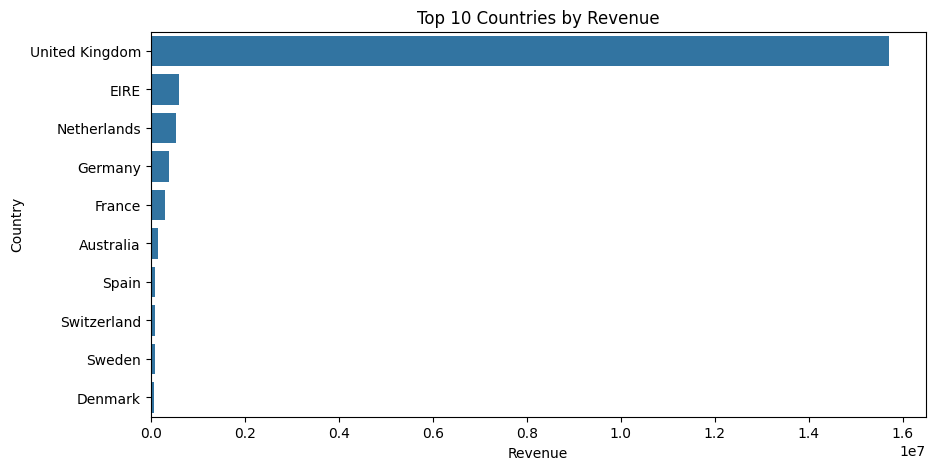

In [84]:
def plot_top_countries(df):
  top_countries = df.groupby('Country')['total_value'].sum().sort_values(ascending=False).head(10)

  plt.figure(figsize=(10, 5))
  sns.barplot(x=top_countries.values, y=top_countries.index)
  plt.title('Top 10 Countries by Revenue')
  plt.xlabel('Revenue')
  plt.ylabel('Country')
  plt.show()
plot_top_countries(df_no_nulls)

<ipython-input-85-6d39b9322872>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-85-6d39b9322872>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.to_period('M')


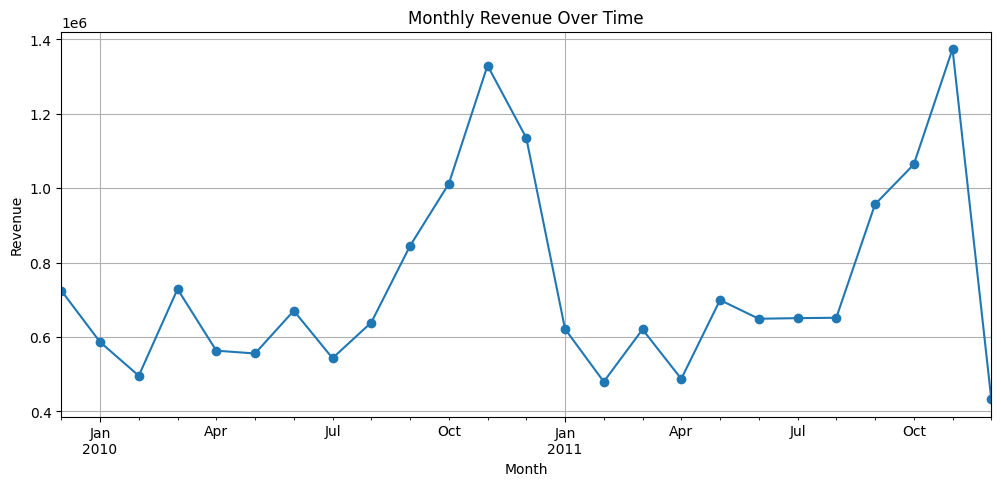

In [85]:
def sales_over_time(df):
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
  df['Month'] = df['InvoiceDate'].dt.to_period('M')
  monthly_sales = df.groupby('Month')['total_value'].sum()

  monthly_sales.plot(kind='line', figsize=(12, 5), marker='o')
  plt.title('Monthly Revenue Over Time')
  plt.xlabel('Month')
  plt.ylabel('Revenue')
  plt.grid(True)
  plt.show()
sales_over_time(df_no_nulls)

<ipython-input-86-c34b2c8279f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()


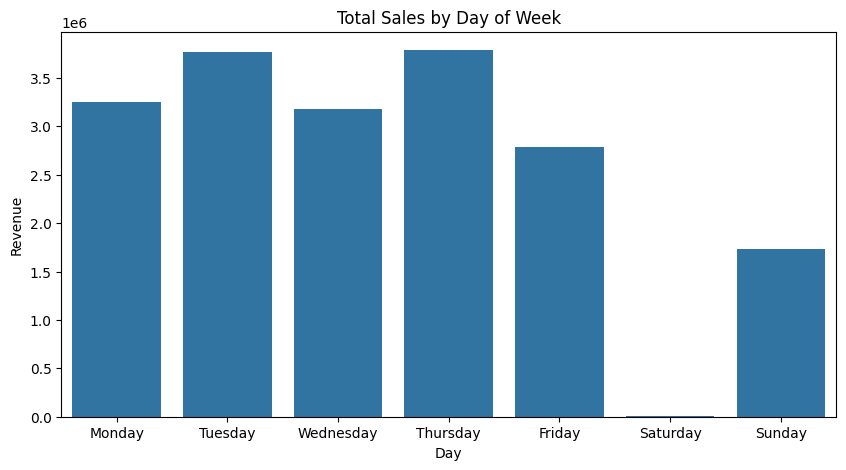

In [86]:
def plot_by_weekday(df):
  df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
  weekday_sales = df.groupby('DayOfWeek')['total_value'].sum().reindex([
      'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

  plt.figure(figsize=(10, 5))
  sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
  plt.title('Total Sales by Day of Week')
  plt.xlabel('Day')
  plt.ylabel('Revenue')
  plt.show()
plot_by_weekday(df_no_nulls)

<ipython-input-87-5e8de742f5e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['InvoiceDate'].dt.hour


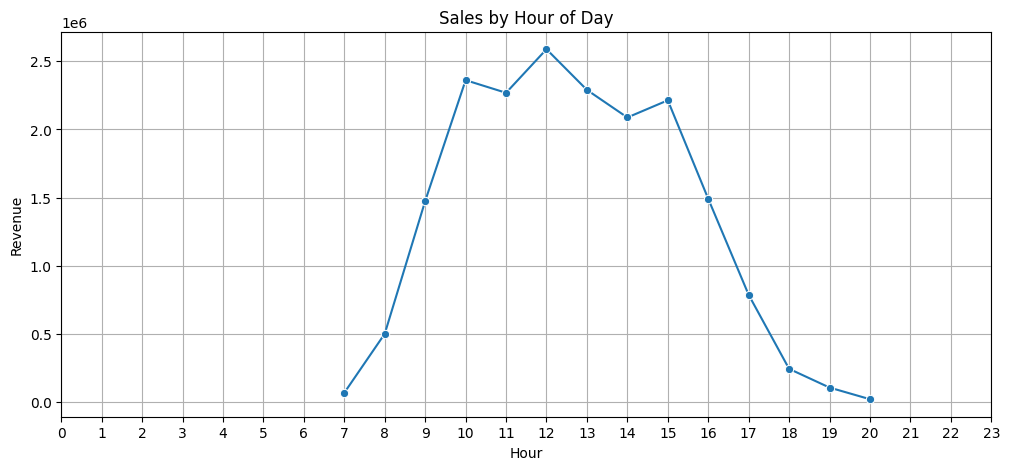

In [87]:
def plot_by_hour(df):
  df['Hour'] = df['InvoiceDate'].dt.hour
  hourly_sales = df.groupby('Hour')['total_value'].sum()

  plt.figure(figsize=(12, 5))
  sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
  plt.title('Sales by Hour of Day')
  plt.xlabel('Hour')
  plt.ylabel('Revenue')
  plt.xticks(range(0, 24))
  plt.grid(True)
  plt.show()
plot_by_hour(df_no_nulls)

In [102]:
print(df_no_nulls.columns.tolist())

['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'total_value', 'InvoiceTotal']


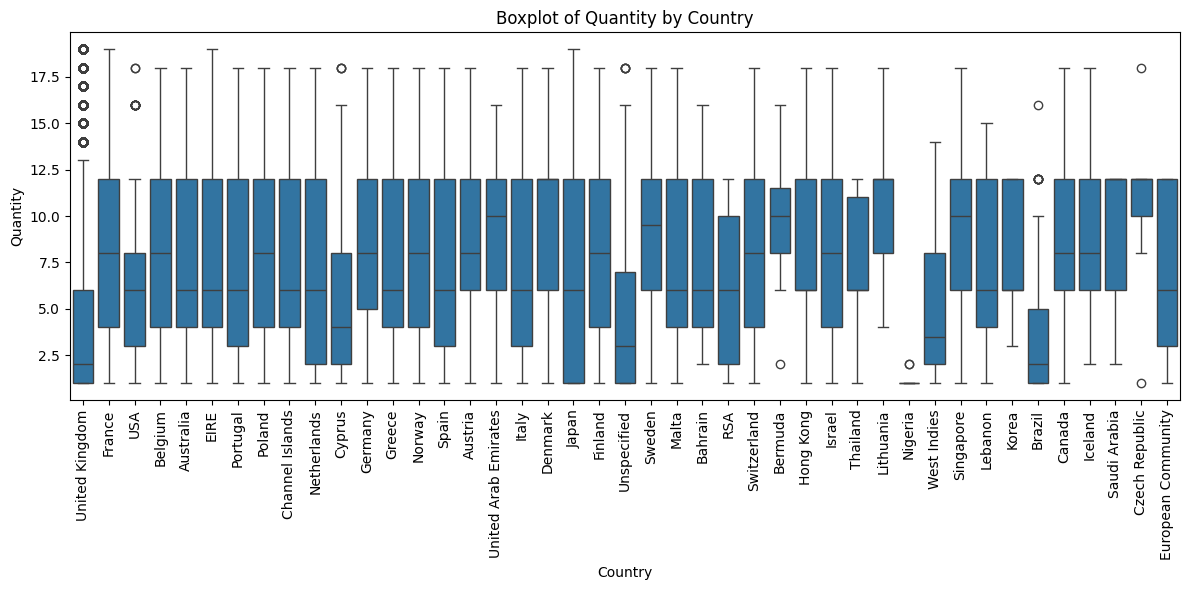

In [89]:
def boxplot_country(df):
  df_fil = df[df['Quantity'] < 20]
  plt.figure(figsize=(12,6))
  sns.boxplot(x='Country', y='Quantity', data=df_fil)

  plt.xticks(rotation=90)
  plt.title('Boxplot of Quantity by Country')
  plt.xlabel('Country')
  plt.ylabel('Quantity')
  plt.tight_layout()
  plt.show()

boxplot_country(df_no_nulls)

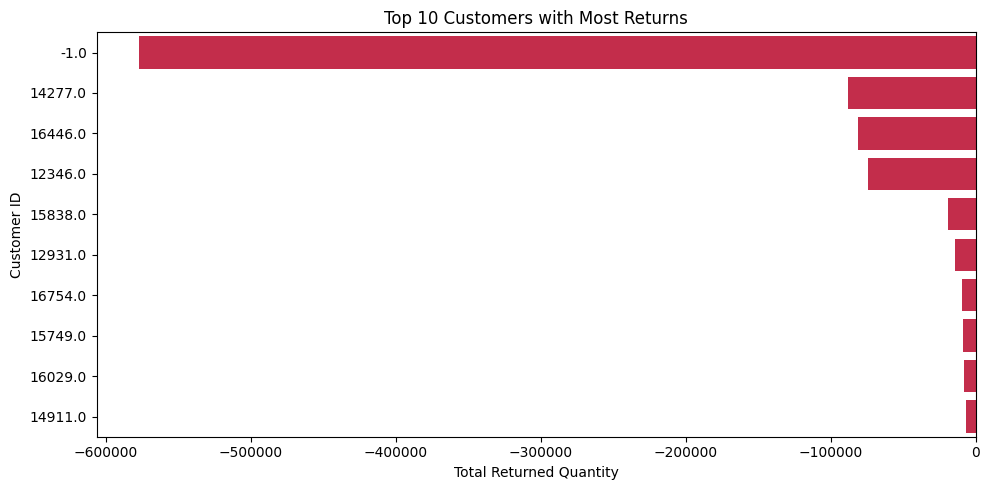

In [67]:
def customer_returns(df):
  # Filter only rows where Quantity is negative
  customer_returns = df[df['Quantity'] < 0].groupby('Customer ID')['Quantity'].sum().sort_values().head(10)

  # Plot
  plt.figure(figsize=(10, 5))
  sns.barplot(x=customer_returns.values, y=customer_returns.index.astype(str), color='crimson')
  plt.title('Top 10 Customers with Most Returns')
  plt.xlabel('Total Returned Quantity')
  plt.ylabel('Customer ID')
  plt.tight_layout()
  plt.show()


customer_returns(df_no_nulls)

## Filter invoices to be unique

In [24]:
def drop_duplicates(df):
  df = df.drop_duplicates(subset='Invoice', keep='first')
  return df
df_no_duplicates = drop_duplicates(df_no_nulls)
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37336 entries, 0 to 1067355
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Invoice       37336 non-null  object        
 1   StockCode     37336 non-null  object        
 2   Description   37336 non-null  object        
 3   Quantity      37336 non-null  int64         
 4   InvoiceDate   37336 non-null  datetime64[ns]
 5   Price         37336 non-null  float64       
 6   Customer ID   37336 non-null  float64       
 7   Country       37336 non-null  object        
 8   total_value   37336 non-null  float64       
 9   InvoiceTotal  37336 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 3.1+ MB


In [26]:
df_no_duplicates.describe()

,Quantity,InvoiceDate,Price,Customer ID,total_value,InvoiceTotal
count,37336.00000,37336,37336.000000,37336.000000,37336.000000,37336.000000
mean,35.18671,2010-12-23 09:57:43.058710016,7.041223,13452.407730,51.366913,495.780685
min,1.00000,2009-12-01 07:45:00,-53594.360000,-1.000000,-53594.360000,-53594.360000
25%,2.00000,2010-06-24 10:55:00,1.250000,13155.000000,7.500000,135.057500
50%,8.00000,2010-11-29 17:15:00,2.100000,14852.000000,15.900000,297.600000
75%,20.00000,2011-07-07 16:27:45,4.650000,16596.000000,33.000000,490.392500
max,74215.00000,2011-12-09 12:50:00,25111.090000,18287.000000,77183.600000,77183.600000
std,439.66581,NaN,475.002353,5229.352706,642.558778,1333.796404


#Create a classification Model

In [30]:
def create_customer_df(df):
    df = df.copy()  #make a safe copy

    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    customer_df = df.groupby('Customer ID').agg({
        'Invoice': 'nunique',
        'Quantity': 'sum',
        'total_value': 'sum',
        'InvoiceDate': lambda x: (x.max() - x.min()).days + 1
    }).rename(columns={
        'Invoice': 'NumInvoices',
        'Quantity': 'TotalQuantity',
        'total_value': 'TotalSpending',
        'InvoiceDate': 'ActiveDays'
    }).reset_index()

    return customer_df

# Now run safely
customer_df = create_customer_df(df_no_duplicates)
customer_df.head()


,Customer ID,NumInvoices,TotalQuantity,TotalSpending,ActiveDays
0,-1.0,4490,222364,53954.65,738
1,12346.0,11,74258,77375.34,401
2,12347.0,8,106,180.86,403
3,12348.0,5,440,344.56,363
4,12349.0,3,17,52.65,571


In [76]:
customer_df.head()

,Customer ID,NumInvoices,TotalQuantity,TotalSpending,ActiveDays,Label
0,-1.0,4490,222364,53954.65,738,1
1,12346.0,11,74258,77375.34,401,1
2,12347.0,8,106,180.86,403,0
3,12348.0,5,440,344.56,363,0
4,12349.0,3,17,52.65,571,0


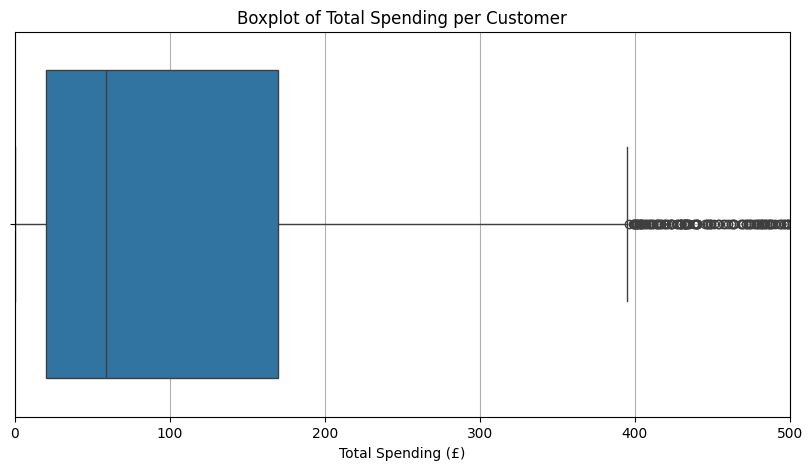

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=customer_df['TotalSpending'])
plt.xlim(0, 500)
plt.title('Boxplot of Total Spending per Customer')
plt.xlabel('Total Spending (£)')
plt.grid(True)
plt.show()

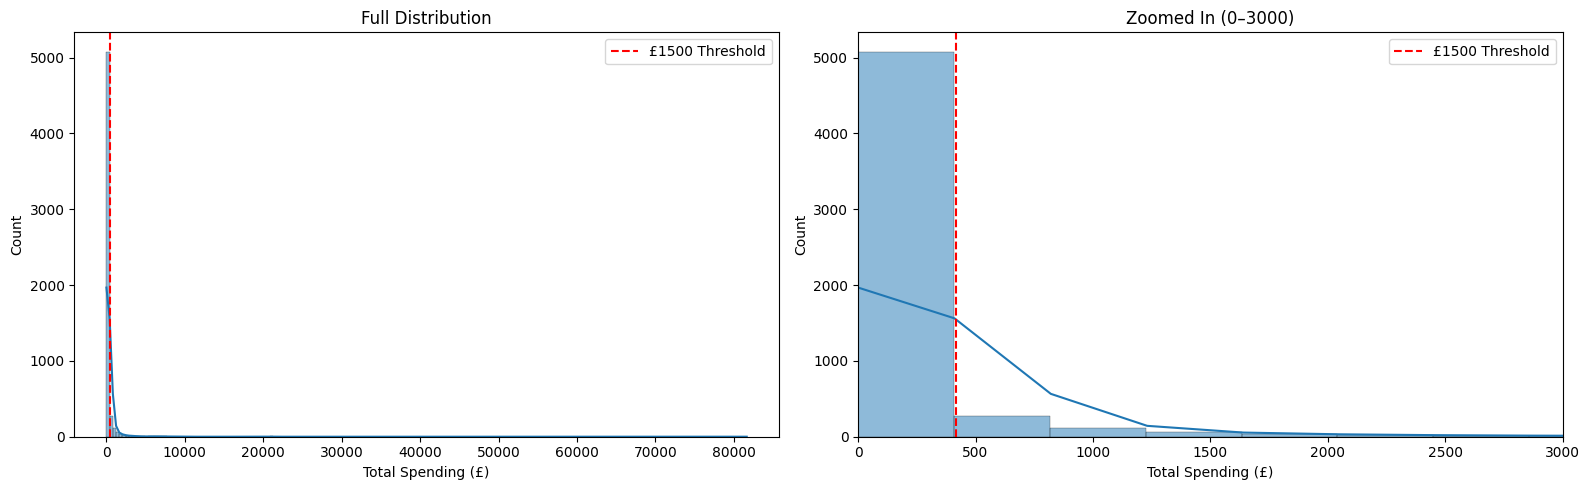

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Full distribution
sns.histplot(customer_df['TotalSpending'], bins=200, kde=True, ax=ax[0])
ax[0].axvline(x=threshold, color='red', linestyle='--', label='£1500 Threshold')
ax[0].set_title("Full Distribution")
ax[0].set_xlabel("Total Spending (£)")
ax[0].legend()

# Zoomed-in distribution
sns.histplot(customer_df['TotalSpending'], bins=200, kde=True, ax=ax[1])
ax[1].axvline(x=threshold, color='red', linestyle='--', label='£1500 Threshold')
ax[1].set_xlim(0, 3000)
ax[1].set_title("Zoomed In (0–3000)")
ax[1].set_xlabel("Total Spending (£)")
ax[1].legend()

plt.tight_layout()
plt.show()


In [79]:
threshold = customer_df['TotalSpending'].quantile(0.895)  # Top 10%
customer_df['Label'] = (customer_df['TotalSpending'] > threshold).astype(int)

In [80]:
X = customer_df[['NumInvoices', 'TotalQuantity', 'TotalSpending', 'ActiveDays']]
y = customer_df['Label']

In [81]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Normal', 'Premium']))


              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      1022
     Premium       1.00      0.99      1.00       116

    accuracy                           1.00      1138
   macro avg       1.00      1.00      1.00      1138
weighted avg       1.00      1.00      1.00      1138



In [84]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1022    0]
 [   1  115]]


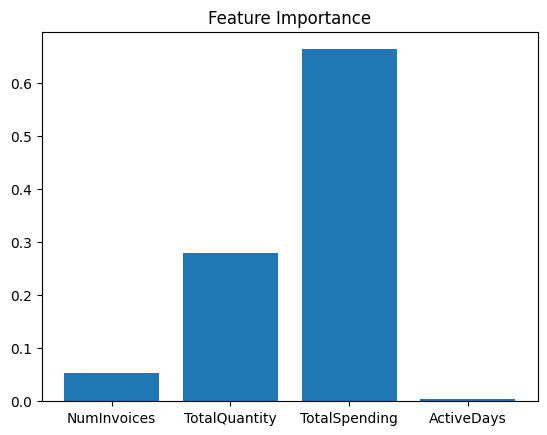

In [83]:

importances = model.feature_importances_
plt.bar(X.columns, importances)
plt.title('Feature Importance')
plt.show()


## Clustering

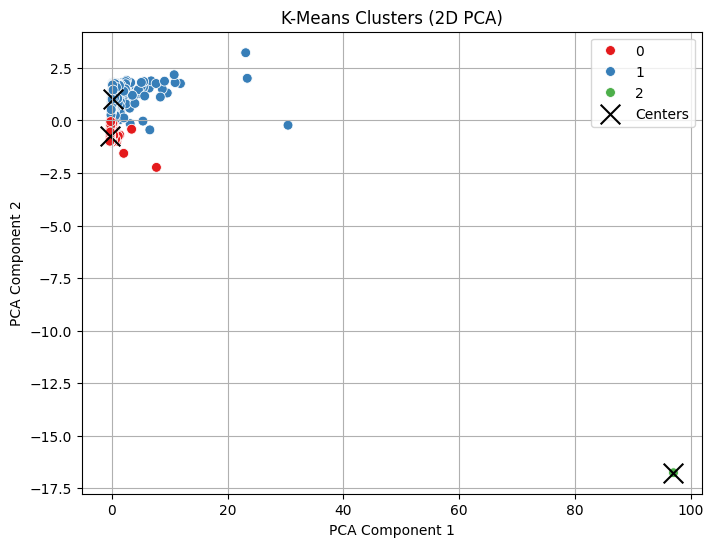

In [90]:


# Select features and scale
features = customer_df[['NumInvoices', 'TotalQuantity', 'TotalSpending', 'ActiveDays']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply Principla Components Analisis to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centers = pca.transform(kmeans.cluster_centers_)

# Step 4: Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='x', label='Centers')
plt.title('K-Means Clusters (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


### Mean shift clustering

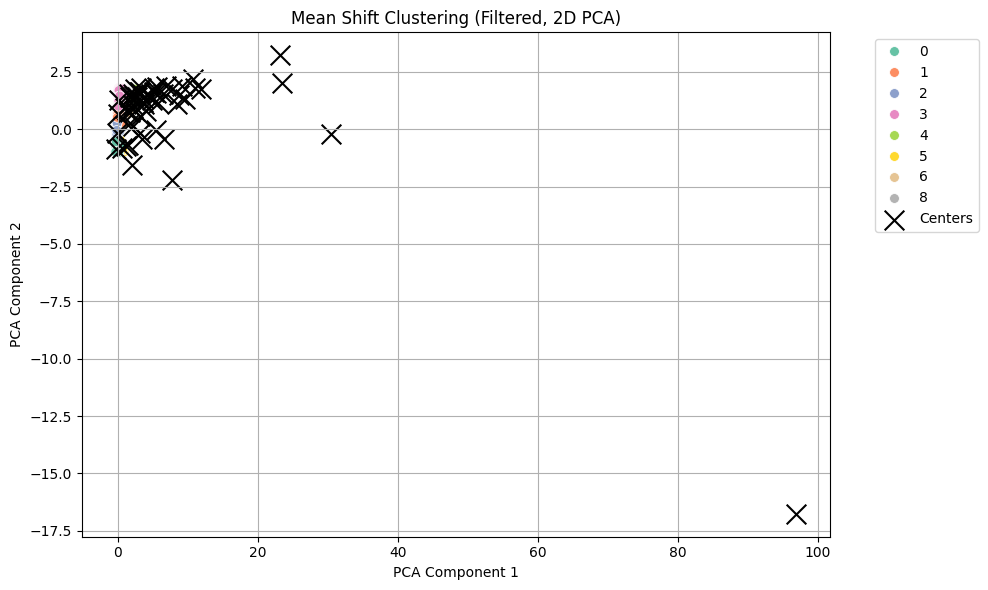

In [101]:

# Count cluster sizes
unique, counts = np.unique(labels_ms, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

# Keep only major clusters
valid_clusters = [k for k, v in cluster_sizes.items() if v > 5]
mask = np.isin(labels_ms, valid_clusters)

# Filter for plotting
X_pca_filtered = X_pca[mask]
labels_filtered = labels_ms[mask]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_filtered[:, 0], y=X_pca_filtered[:, 1], hue=labels_filtered, palette='Set2', s=50)
plt.scatter(centers_ms[:, 0], centers_ms[:, 1], c='black', s=200, marker='x', label='Centers')
plt.title('Mean Shift Clustering (Filtered, 2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Comparison: K-Means vs. Mean Shift for Customer Segmentation

| Aspect                        | K-Means Clustering                         | Mean Shift Clustering                        |
|------------------------------|--------------------------------------------|----------------------------------------------|
| **Number of Clusters**       | 3 (pre-defined)                           | ~8 (automatically discovered after filtering)|
| **Cluster Shape Assumption** | Spherical (equal radius)                   | Arbitrary shape based on data density        |
| **Outlier Sensitivity**      | Sensitive to outliers | Naturally isolates outliers as tiny clusters |
| **Cluster Size Balance**     | Fairly balanced clusters                   | Imbalanced (many small clusters)             |
| **Interpretability**         | Simple, business-friendly segmentation     | More complex, may find nuanced subgroups     |
| **Scalability**              | Fast and efficient on large datasets       | Slower on large datasets                     |


---

## Conclusion

- Use **K-Means** if your goal is to create **simple, actionable segments** for reporting.
- Use **Mean Shift** if you want to **explore hidden customer behavior**, **find outliers**, or don't want to define the number of clusters beforehand.



## Linear regresion

In [125]:
def create_preds_df(df):
    df = df.copy()  # Safe copy

    # Convert to datetime
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    # Group daily total sales
    daily_sales = df.groupby(df['InvoiceDate'].dt.date)['total_value'].sum().reset_index()
    daily_sales.columns = ['Date', 'Sales']
    daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

    # --- Time-based features ---
    daily_sales['Month'] = daily_sales['Date'].dt.month
    daily_sales['Weekday'] = daily_sales['Date'].dt.weekday
    daily_sales['IsWeekend'] = daily_sales['Weekday'].isin([5, 6]).astype(int)

    # --- Holiday promo flag
    daily_sales['IsChristmas'] = daily_sales['Date'].dt.month == 12
    daily_sales['IsBlackFriday'] = daily_sales['Date'] == '2011-11-25'  # example


    # --- Drop NaN from lag ---
    daily_sales.dropna(inplace=True)

    return daily_sales

daily_sales = create_preds_df(df_no_nulls)
daily_sales.head()



,Date,Sales,Month,Weekday,IsWeekend,IsChristmas,IsBlackFriday
0,2009-12-01,44256.84,12,1,0,True,False
1,2009-12-02,55134.37,12,2,0,True,False
2,2009-12-03,71954.30,12,3,0,True,False
3,2009-12-04,37511.77,12,4,0,True,False
4,2009-12-05,9803.05,12,5,1,True,False


In [126]:
# Sort by date
daily_sales = daily_sales.sort_values('Date')

# 80% train, 20% test split
split_idx = int(len(daily_sales) * 0.8)
train = daily_sales[:split_idx]
test = daily_sales[split_idx:]

# Features and target
features = ['Month', 'Weekday', 'IsWeekend','IsChristmas','IsBlackFriday']
X_train = train[features]
y_train = train['Sales']
X_test = test[features]
y_test = test['Sales']


In [127]:


# Initialize and train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)


In [128]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 13224.296205935912
Root Mean Squared Error (RMSE): 17360.70739215203
R² Score: 0.2322505927047709


In [131]:


# --- Select features and target ---
feature_cols = ['Month', 'Weekday', 'IsWeekend','IsChristmas','IsBlackFriday']  # Add more if available
X = daily_sales[feature_cols]
y = daily_sales['Sales']

# --- Split the data (time-aware split is better, but here using random split for simplicity) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# --- Train Decision Tree Regressor ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# --- Predict ---
y_pred = dt_model.predict(X_test)

# --- Evaluate ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Decision Tree Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Decision Tree Performance:
Mean Absolute Error (MAE): 11617.91998589138
Root Mean Squared Error (RMSE): 15948.575220670196
R² Score: 0.35206947993022575


In [132]:


# --- Select features and target ---
feature_cols = ['Month', 'Weekday', 'IsWeekend', 'IsChristmas','IsBlackFriday']  # Add more if you have them
X = daily_sales[feature_cols]
y = daily_sales['Sales']

# --- Train-test split (no shuffle to respect time order) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# --- Train Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- Predict ---
y_pred = rf_model.predict(X_test)

# --- Evaluate ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Random Forest Performance:
Mean Absolute Error (MAE): 11399.002776733003
Root Mean Squared Error (RMSE): 15767.883164884328
R² Score: 0.3666679855102336
